1. What is unsupervised learning in the context of machine learning?
- Unsupervised learning is a type of machine learning where the algorithm is trained on unlabeled data and tries to find hidden patterns, groupings, or structures without predefined output labels.

2. How does K-Means clustering algorithm work?
- Choose k initial centroids (randomly or via K-Means++).
- Assign each data point to the nearest centroid (forming clusters).
- Recalculate centroids as the mean of all points in each cluster.
- Repeat assignment and centroid update until convergence (no change or minimal change in centroids).

3. Explain the concept of a dendrogram in hierarchical clustering.
- A dendrogram is a tree-like diagram that shows how data points are merged (agglomerative) or split (divisive) at successive stages of hierarchical clustering. The y-axis represents distance/similarity.

4. What is the main difference between K-Means and Hierarchical Clustering?
- K-Means requires specifying k clusters in advance, and clusters are non-hierarchical.
- Hierarchical clustering builds a hierarchy of clusters (tree structure) and doesn’t require pre-specifying k (though you can cut the dendrogram later).

5. What are the advantages of DBSCAN over K-Means?
- Doesn’t require pre-specifying the number of clusters.
- Can find clusters of arbitrary shape (not just spherical).
- Handles noise/outliers better.

6. When would you use Silhouette Score in clustering?
- When you want to evaluate clustering quality by measuring how similar a point is to its own cluster vs. other clusters. It helps compare different clustering models or choose the optimal number of clusters.

7. What are the limitations of Hierarchical Clustering?
- Computationally expensive for large datasets (O(n²)).
- Sensitive to noise and outliers.
- Once a merge/split is done, it cannot be undone.

8. Why is feature scaling important in clustering algorithms like K-Means?
- Because K-Means uses Euclidean distance, features with larger ranges dominate clustering. Scaling ensures all features contribute equally.

9. How does DBSCAN identify noise points?
- Points that do not belong to any cluster (not in the neighborhood of enough points) are labeled as noise.

10. Define inertia in the context of K-Means.
- Inertia is the sum of squared distances between each point and its assigned cluster centroid. Lower inertia indicates tighter, more compact clusters.

11. What is the elbow method in K-Means clustering?
- A method to determine the optimal k. Plot inertia vs. k and look for the “elbow point” where inertia decreases slowly afterward.

12. Describe the concept of "density" in DBSCAN.
- Density is defined by the number of points within a neighborhood of radius ε (eps). A region is dense if it contains at least minPts points.

13. Can hierarchical clustering be used on categorical data?
- Yes, but with appropriate distance measures (like Hamming, Jaccard, Gower distance) instead of Euclidean.

14. What does a negative Silhouette Score indicate?
- It means the point is likely assigned to the wrong cluster (it is closer to a neighboring cluster than its own).

15. Explain the term "linkage criteria" in hierarchical clustering.
- Linkage criteria define how the distance between clusters is measured when merging:

16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?
- Because K-Means assumes clusters are spherical, equal-sized, and equally dense. It struggles with elongated, uneven, or overlapping clusters.

17. What are the core parameters in DBSCAN, and how do they influence clustering?
- ε (eps): radius of the neighborhood.
- minPts: minimum number of points required to form a dense region.
- Larger eps = bigger clusters, smaller eps = more noise. Higher minPts = stricter cluster formation.

18. How does K-Means++ improve upon standard K-Means initialization?
- K-Means++ chooses initial centroids more carefully by spreading them out, reducing the chance of poor clustering and speeding up convergence.

19. What is agglomerative clustering?
- A bottom-up hierarchical method where each point starts as its own cluster, and clusters are merged iteratively until one big cluster remains (or until a stopping condition).

20. What makes Silhouette Score a better metric than just inertia for model evaluation?
- Inertia only measures cluster compactness.
- Silhouette Score considers both cohesion (within-cluster similarity) and separation (between-cluster dissimilarity), giving a more balanced evaluation of clustering quality.

21. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=1)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=4)

model.fit(X)
label = model.predict(X)
centroids = model.cluster_centers_

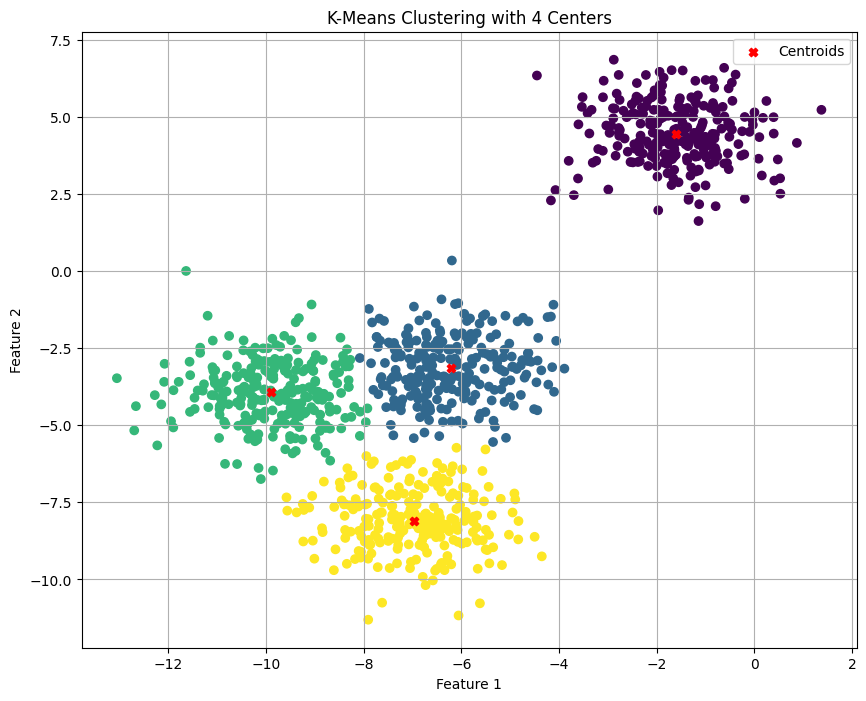

In [13]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,:-1],X[:,-1:],c=label)
plt.scatter(centroids[:,:-1], centroids[:,-1:], marker='X', c='red', label='Centroids')
plt.title(f'K-Means Clustering with 4 Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

22.  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [15]:
from sklearn.datasets import load_iris

data22 = load_iris()
X=data22.data
y=data22.target

from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
predicted_labels = agg_clustering.fit_predict(X)

print(f"First 10 predicted labels:{predicted_labels[:10]}")


First 10 predicted labels:[1 1 1 1 1 1 1 1 1 1]


23. Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

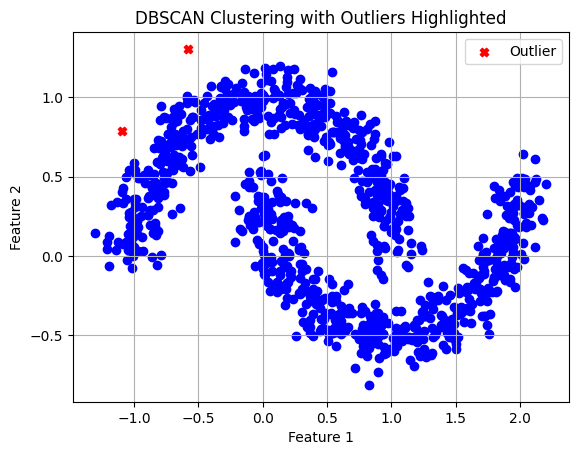

In [37]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, noise=0.1, random_state=1)

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.2)
lab = dbscan.fit_predict(X)

X_normal = X[lab!=-1]
X_outlier = X[lab==-1]

plt.Figure(figsize=(10,8))
plt.scatter(X_normal[:,:-1],X_normal[:,-1:],c='b')
plt.scatter(X_outlier[:,:-1], X_outlier[:,-1:], marker='X', c='red', label='Outlier')
plt.title(f'DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

24. Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster.

In [44]:
from sklearn.datasets import load_wine
wine = load_wine()
X = wine.data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(X_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [62]:
labl = kmean.labels_
labl

count0 = np.sum(labl == 0)
count1 = np.sum(labl == 1)
count2 = np.sum(labl == 2)

print(f"the size of the firt cluster is {count0}, \n the size ot the second cluster is {count1}, \n the size of the third cluster is {count2}")

the size of the firt cluster is 62, 
 the size ot the second cluster is 51, 
 the size of the third cluster is 65


25. Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

In [77]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, noise=0.1, random_state=1)

from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.2)
model.fit(X)
label = model.labels_

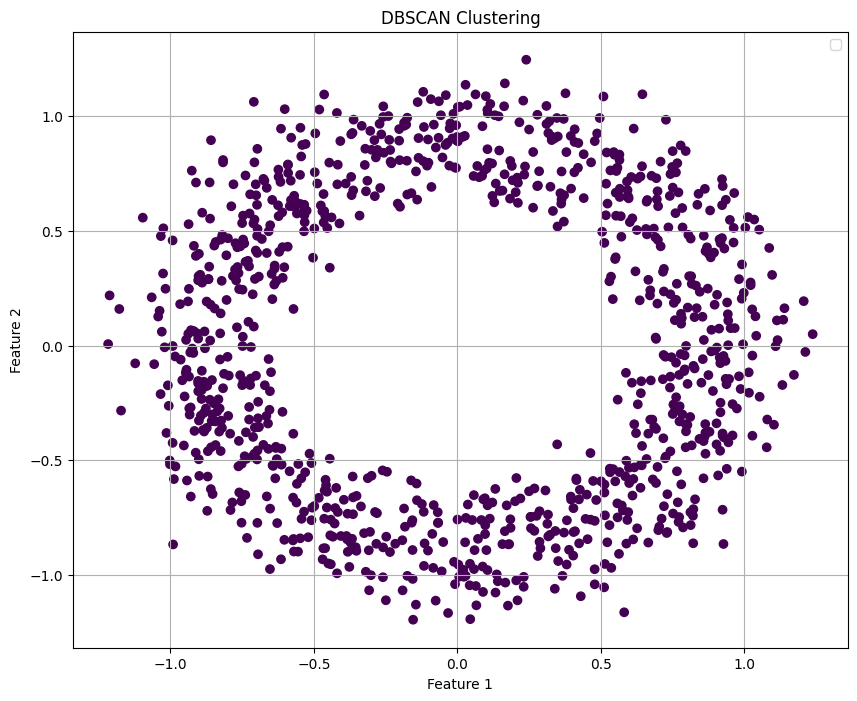

In [78]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,:-1], X[:,-1:], c = label)
plt.title(f'DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

26. Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids.

In [87]:
from sklearn.datasets import load_breast_cancer
cancer  = load_breast_cancer()
X = cancer.data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)

model.fit(X_scaled)

centroid = model.cluster_centers_

print(f"the centroids of the clusters are {centroid}")

the centroids of the clusters are [[0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]
 [0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]]


27. Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN.

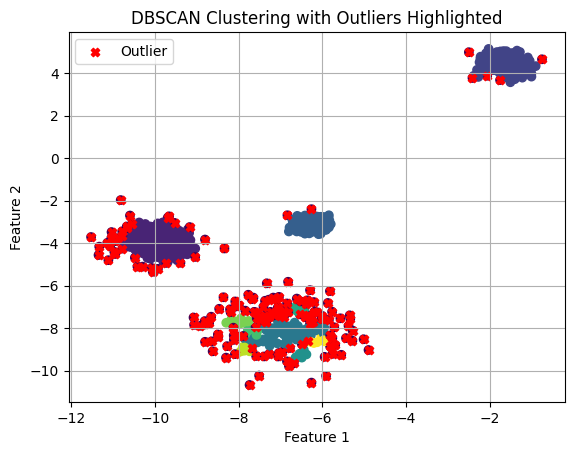

In [104]:
from sklearn.datasets import make_blobs

X,y = make_blobs(n_samples=1000, n_features=2, centers = 4, cluster_std = [0.3, 0.5, 0.8, 0.2] , random_state=1)

from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.2)
model.fit(X)

label = model.labels_

X_outlier = X[label==-1]

plt.Figure(figsize=(20,15))
plt.scatter(X[:,:-1],X[:,-1:],c=label)
plt.scatter(X_outlier[:,:-1], X_outlier[:,-1:], marker='X', c='red', label='Outlier')
plt.title(f'DBSCAN Clustering with Outliers Highlighted')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

28. Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

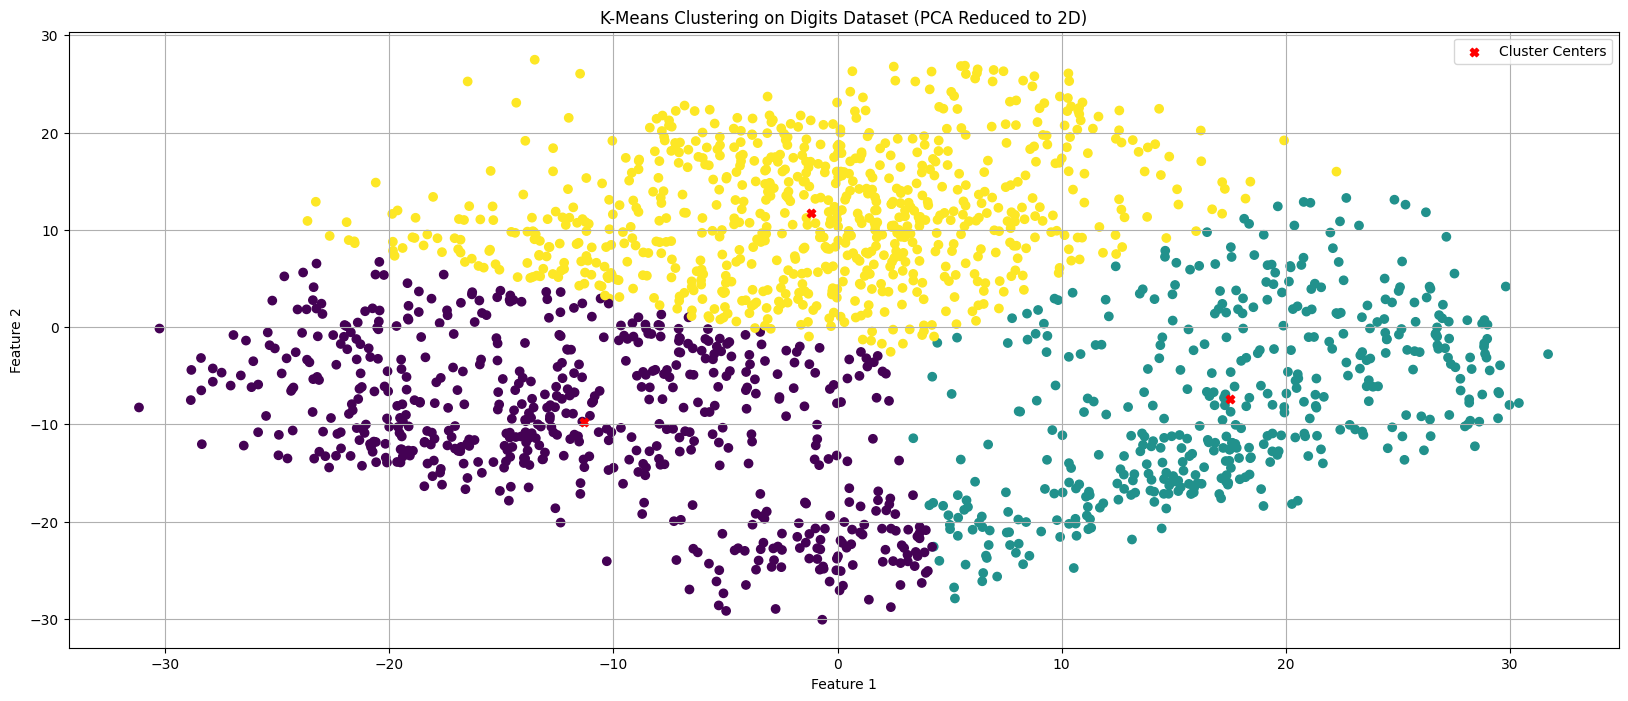

In [110]:
from sklearn.datasets import load_digits
digit = load_digits()
X = digit.data

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_trans = pca.fit_transform(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)

kmean.fit(X_trans)

label = kmean.labels_


plt.figure(figsize=(20,8))
plt.scatter(X_trans[:,:-1], X_trans[:,-1:], c = label)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], marker='X', color='red', label='Cluster Centers')
plt.title(f'K-Means Clustering on Digits Dataset (PCA Reduced to 2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


29. Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

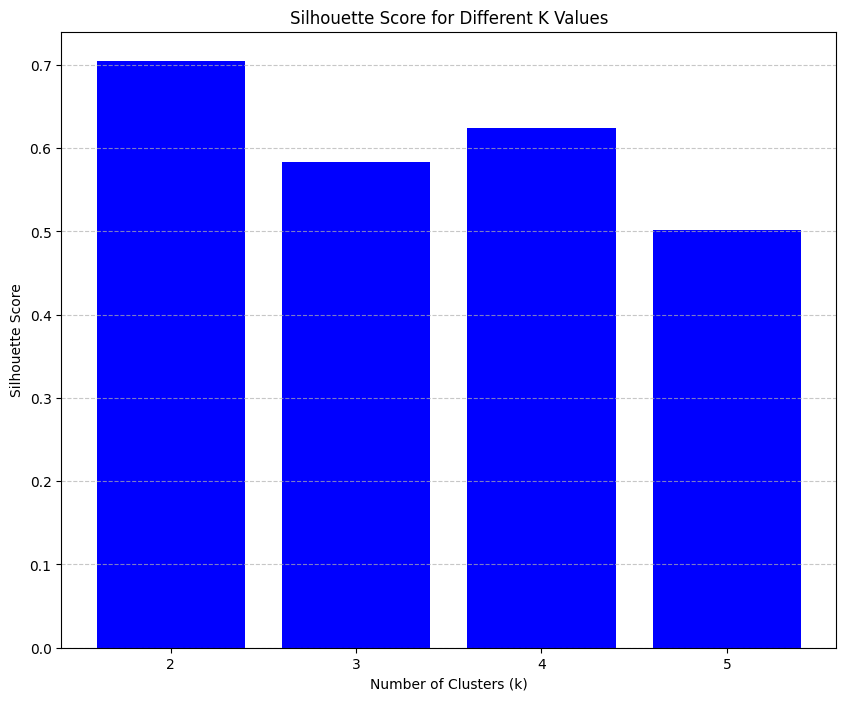

In [118]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=1)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 8))
plt.bar(k_values, silhouette_scores, color='blue')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


30. Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

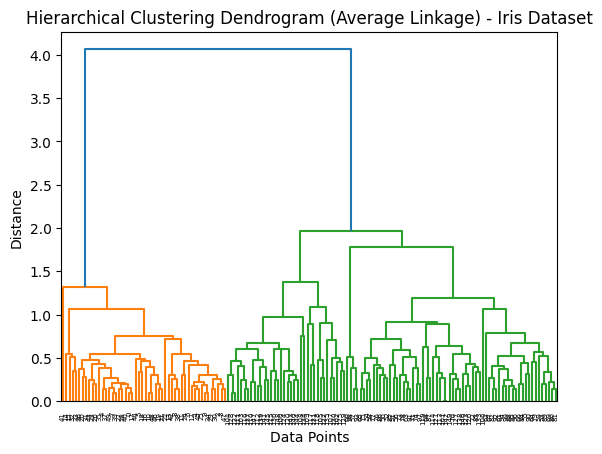

In [126]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

import scipy.cluster.hierarchy as sc

plt.Figure(figsize=(20, 7))
sc.dendrogram(sc.linkage(X, method='average'))
plt.title('Hierarchical Clustering Dendrogram (Average Linkage) - Iris Dataset')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()